In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Leer csv

In [3]:
df = pd.read_csv('adult.csv', encoding='ISO-8859-1')

### Funciones

In [13]:
def H(x): #ENTROPÍA
    h = 0
    M = len(x)
    values, counts = np.unique(x, return_counts=True) #nos regresa arrays únicos + el número de veces que aparecen 
    PX = counts/M #px = probabilidad x
    h = -np.sum( PX * np.log2(PX) ) #entropía normal
    ncat = len(values)
    hmax = -np.log2(1/ncat) #entropía máxima
    return h,hmax
    
def IM(x,y):  #Información mutua
    im = 0
    valuesX, countsX = np.unique(x, return_counts=True)
    valuesY, countsY = np.unique(y, return_counts=True)
    lenX = len(x)
    PX = countsX/lenX
    PY = countsY/lenX
    
    for i,vx in enumerate(valuesX):
        for j,vy in enumerate(valuesY):
            PXY = np.sum( np.logical_and(x==vx,y==vy) )  / lenX
            if(PX>0):
                im += PXY * np.log2( PXY / (PX[i] * PY[j]) ) 
    return im
            
    
col = df.columns
fil = df.columns #columnas, filas
content = np.zeros( (len(col),len(fil)) ) #creo matriz

for i,c in enumerate(col):
        for j,f in enumerate(fil):
            if(c!=f):
                content[i,j] = IM(c,f) #llamo la función por cada valor de la tabla
final_mat = pd.DataFrame(data=content, columns=col, index=fil)
final_mat


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
age,0.000000,0.528321,0.528321,0.528321,0.528321,0.528321,0.528321,0.528321,0.528321,0.528321,0.528321,0.528321
workclass,0.352214,0.000000,0.352214,0.352214,0.352214,0.352214,0.352214,0.352214,0.352214,0.352214,0.352214,0.352214
education,0.352214,0.352214,0.000000,0.352214,0.352214,0.352214,0.352214,0.352214,0.352214,0.352214,0.352214,0.352214
education-num,0.284649,0.284649,0.284649,0.000000,0.284649,0.284649,0.284649,0.284649,0.284649,0.284649,0.284649,0.284649
marital-status,0.271954,0.271954,0.271954,0.271954,0.000000,0.271954,0.271954,0.271954,0.271954,0.271954,0.271954,0.271954
occupation,0.332193,0.332193,0.332193,0.332193,0.332193,0.000000,0.332193,0.332193,0.332193,0.332193,0.332193,0.332193
relationship,0.298747,0.298747,0.298747,0.298747,0.298747,0.298747,0.000000,0.298747,0.298747,0.298747,0.298747,0.298747
race,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,0.500000,0.500000,0.500000,0.500000
sex,0.528321,0.528321,0.528321,0.528321,0.528321,0.528321,0.528321,0.528321,0.000000,0.528321,0.528321,0.528321
hours-per-week,0.271954,0.271954,0.271954,0.271954,0.271954,0.271954,0.271954,0.271954,0.271954,0.000000,0.271954,0.271954


## 1. Calculate the entropy for each feature

In [5]:
names = np.array(['age','workclass','education-num','marital-status','occupation','relationship','race','sex',
                'hours-per-week','native-country','income'])
for i in range (0,names.size-1):
    print('H(',names[i],'):\n\t', H(df[names[i]].values))

H( age ):
	 (5.683324396400329, 6.189824558880018)
H( workclass ):
	 (1.647976927509927, 3.1699250014423126)
H( education-num ):
	 (2.9313508978037115, 4.0)
H( marital-status ):
	 (1.8336493538835446, 2.807354922057604)
H( occupation ):
	 (3.516903064343104, 3.9068905956085187)
H( relationship ):
	 (2.1544237955049743, 2.584962500721156)
H( race ):
	 (0.7987406510139586, 2.321928094887362)
H( sex ):
	 (0.9157360598501509, 1.0)
H( hours-per-week ):
	 (3.4795648800680166, 6.554588851677638)
H( native-country ):
	 (0.9437954138017222, 5.392317422778761)


### <font color='pink'>_1. Comment:_</font>
<font color='pink' size='2'>
Entropy is the chaos or uniformity measurement in values of a variable.
     In this case we see that, for example, the chaotic variables could be:
         <ol>
          <li>age</li>
          <li>workclass (maybe)</li>
          <li>relationship</li>
          <li>sex</li>
          <li>income</li>
        </ol>
     Because they have an entropy very close to their maximum possible entropy. Since there is little difference between both numbers, it follows that there is a lot of entropy.
</font>

## 2. Graph the mutual information matrix

In [6]:
#IM()

### <font color='pink'>_2. Comment:_</font>

## 3. Graph a countplot or a rectangle plot for each feature

In [7]:
names = np.array(['age','workclass','education-num','marital-status','occupation','relationship','race','sex',
                'hours-per-week','native-country','income'])

-------------------------- age --------------------------


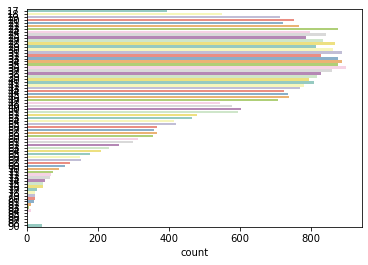

-------------------------- workclass --------------------------


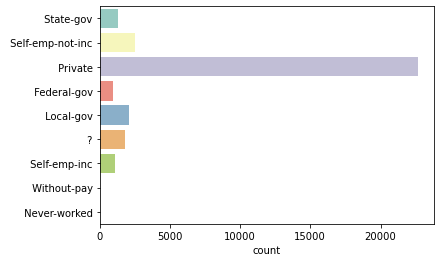

-------------------------- education-num --------------------------


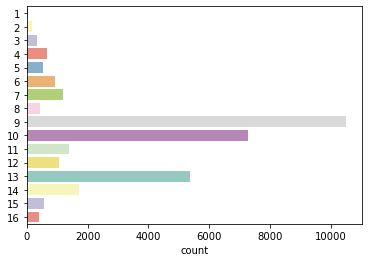

-------------------------- marital-status --------------------------


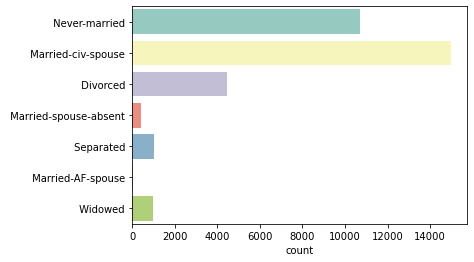

-------------------------- occupation --------------------------


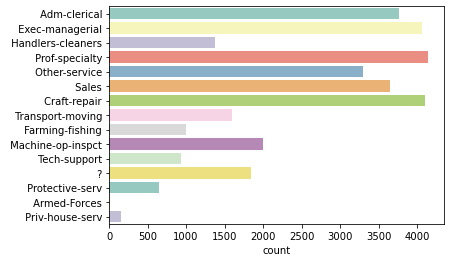

-------------------------- relationship --------------------------


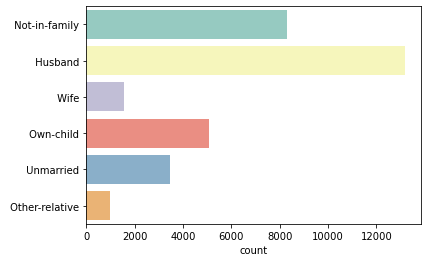

-------------------------- race --------------------------


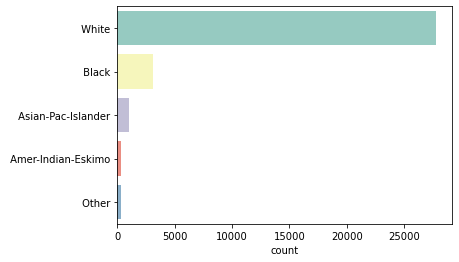

-------------------------- sex --------------------------


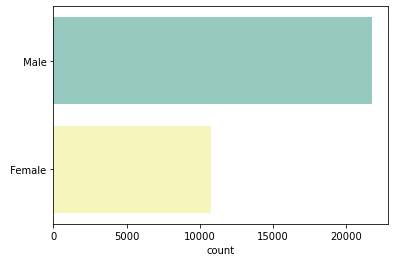

-------------------------- native-country --------------------------


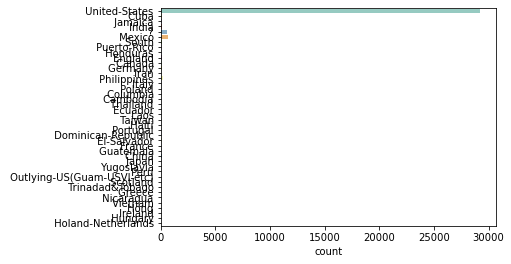

In [8]:
for i in range(0, names.size-1):
            if(names[i] != 'hours-per-week'):
                plt.figure()
                sns.countplot(y=df[names[i]].values, palette="Set3")
                print("--------------------------",names[i],"--------------------------")
                plt.show()
      

### <font color='pink'>_3. Comment:_</font>
<font color='pink' size='2'>
<ul>
  <li>In the workclass graphic we can see private workclass is the most abundant. It is a very notable outlyer. This means the most adults have a work of private type. </li>
  <li>In the marital-status, most of the adults have never married or married by civil.</li>
  <li>Most of this adults work in craft-repair, exec-managerial, and other job is not listed in the options. But the less demanded job is armed-forces. Maybe because of the risk or maybe it is not payed well. </li>
    <li>It's also important to consider that for this analysis, we have more males than females.</li>
    <li>Most of the persons include in the data are white race.</li>
    <li>And most of this people are from USA</li>
</ul>
</font>

## 4. Generate a visualization to compare two features, for example, sex and education

<AxesSubplot:xlabel='age', ylabel='income'>

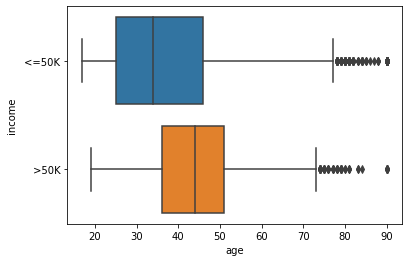

In [9]:
sns.boxplot(data=df, x='age', y='income')

### <font color='pink'>_4. Comment:_</font>

<font color='pink' size='2'>I used a boxplot to compare this two features (income, age), because in that way, unlike the other visualizations, I can know how many people are within the normal range according to the given information, but also I can know how many people are out of the normal range (overlyers). In my opinion, this is the more complete visualization.
I choose this two features because in this way I can know if the age influences in their income.
Here we can see that the normal range of the people who wins over 50k is between 20 and 73~ years old. In the other hand, people who wins less or equal than 50k, have a more extended range (between 20 and almost 80 years old). Also we can see that there are many overlyers, even more than people who wins > 50k. 
What I think is happening here, is that when you are 20-30 years old and you're working, you have less experience than a person who has been working for many years. This would explain why this range wins less. 
In the other hand, over 50 years old, maybe some capabilities can be affected, that's why some companies prefer to hire younger people.
</font>

## 5. Write at least two insights from the data (justifying with metrics or graphs). Insights consist of some interesting facts that you discover from the Exploratory Data Analysis

In [10]:
x = np.zeros(df.income.size)
cont=0
for i in df.income:
     print('inc: ', x.size)
     if(i == ' >50K'):
          x[cont] = 1
#         x = np.insert(x, cont, 1) #>50K
     else: x = np.insert(x, cont, -1) #<=50K
     cont+=1

data = {
  "income": x,
  "race": df.race
}
print("x:",x)
print(df.race.size)
# data = {
#   "calories": [420, 380, 390],
#   "duration": [50, 40, 45]
# }
DATA = pandas.DataFrame(data)
# DATA.to_csv('income_race.csv')
DATA

# df = pd.read_csv('income_race.csv', encoding='ISO-8859-1')
# sns.scatterplot(data=df, hue=x, y='race')

inc:  32561
inc:  32562
inc:  32563
inc:  32564
inc:  32565
inc:  32566
inc:  32567
inc:  32568
inc:  32568
inc:  32568
inc:  32568
inc:  32568
inc:  32568
inc:  32569
inc:  32570
inc:  32570
inc:  32571
inc:  32572
inc:  32573
inc:  32574
inc:  32574
inc:  32574
inc:  32575
inc:  32576
inc:  32577
inc:  32578
inc:  32578
inc:  32579
inc:  32579
inc:  32580
inc:  32581
inc:  32582
inc:  32583
inc:  32584
inc:  32585
inc:  32586
inc:  32587
inc:  32588
inc:  32589
inc:  32589
inc:  32590
inc:  32591
inc:  32592
inc:  32593
inc:  32594
inc:  32595
inc:  32595
inc:  32596
inc:  32597
inc:  32598
inc:  32599
inc:  32600
inc:  32601
inc:  32601
inc:  32601
inc:  32602
inc:  32602
inc:  32603
inc:  32604
inc:  32605
inc:  32606
inc:  32607
inc:  32608
inc:  32609
inc:  32609
inc:  32610
inc:  32611
inc:  32612
inc:  32612
inc:  32612
inc:  32613
inc:  32614
inc:  32615
inc:  32615
inc:  32616
inc:  32617
inc:  32618
inc:  32619
inc:  32620
inc:  32621
inc:  32622
inc:  32623
inc:  32624
inc:

inc:  33140
inc:  33140
inc:  33140
inc:  33141
inc:  33142
inc:  33143
inc:  33143
inc:  33144
inc:  33145
inc:  33146
inc:  33147
inc:  33148
inc:  33148
inc:  33149
inc:  33149
inc:  33150
inc:  33151
inc:  33151
inc:  33152
inc:  33152
inc:  33152
inc:  33153
inc:  33154
inc:  33155
inc:  33156
inc:  33157
inc:  33158
inc:  33159
inc:  33160
inc:  33160
inc:  33161
inc:  33162
inc:  33163
inc:  33164
inc:  33164
inc:  33165
inc:  33166
inc:  33167
inc:  33167
inc:  33168
inc:  33168
inc:  33169
inc:  33170
inc:  33171
inc:  33172
inc:  33173
inc:  33173
inc:  33174
inc:  33175
inc:  33176
inc:  33176
inc:  33177
inc:  33178
inc:  33179
inc:  33179
inc:  33179
inc:  33180
inc:  33181
inc:  33182
inc:  33183
inc:  33184
inc:  33184
inc:  33185
inc:  33185
inc:  33185
inc:  33186
inc:  33187
inc:  33188
inc:  33189
inc:  33190
inc:  33191
inc:  33192
inc:  33193
inc:  33193
inc:  33194
inc:  33194
inc:  33195
inc:  33196
inc:  33197
inc:  33198
inc:  33199
inc:  33199
inc:  33200
inc:

inc:  33669
inc:  33670
inc:  33670
inc:  33670
inc:  33671
inc:  33672
inc:  33673
inc:  33674
inc:  33675
inc:  33676
inc:  33677
inc:  33678
inc:  33679
inc:  33680
inc:  33680
inc:  33680
inc:  33681
inc:  33681
inc:  33682
inc:  33683
inc:  33684
inc:  33685
inc:  33685
inc:  33686
inc:  33687
inc:  33687
inc:  33687
inc:  33688
inc:  33688
inc:  33688
inc:  33689
inc:  33689
inc:  33690
inc:  33690
inc:  33691
inc:  33692
inc:  33692
inc:  33693
inc:  33694
inc:  33695
inc:  33696
inc:  33697
inc:  33698
inc:  33699
inc:  33699
inc:  33699
inc:  33700
inc:  33700
inc:  33701
inc:  33701
inc:  33702
inc:  33703
inc:  33704
inc:  33705
inc:  33706
inc:  33707
inc:  33708
inc:  33709
inc:  33710
inc:  33711
inc:  33712
inc:  33712
inc:  33713
inc:  33714
inc:  33714
inc:  33714
inc:  33714
inc:  33715
inc:  33716
inc:  33717
inc:  33718
inc:  33719
inc:  33720
inc:  33721
inc:  33722
inc:  33723
inc:  33724
inc:  33725
inc:  33726
inc:  33727
inc:  33728
inc:  33728
inc:  33729
inc:

inc:  34305
inc:  34305
inc:  34305
inc:  34306
inc:  34307
inc:  34308
inc:  34309
inc:  34309
inc:  34310
inc:  34310
inc:  34311
inc:  34311
inc:  34312
inc:  34313
inc:  34314
inc:  34315
inc:  34315
inc:  34316
inc:  34317
inc:  34318
inc:  34319
inc:  34319
inc:  34319
inc:  34320
inc:  34321
inc:  34321
inc:  34322
inc:  34323
inc:  34323
inc:  34323
inc:  34324
inc:  34325
inc:  34326
inc:  34327
inc:  34327
inc:  34328
inc:  34329
inc:  34330
inc:  34330
inc:  34330
inc:  34331
inc:  34332
inc:  34333
inc:  34334
inc:  34334
inc:  34335
inc:  34336
inc:  34337
inc:  34338
inc:  34339
inc:  34340
inc:  34341
inc:  34342
inc:  34343
inc:  34343
inc:  34344
inc:  34345
inc:  34346
inc:  34347
inc:  34348
inc:  34349
inc:  34350
inc:  34350
inc:  34350
inc:  34351
inc:  34352
inc:  34353
inc:  34353
inc:  34354
inc:  34355
inc:  34356
inc:  34357
inc:  34358
inc:  34358
inc:  34359
inc:  34360
inc:  34361
inc:  34362
inc:  34363
inc:  34364
inc:  34364
inc:  34365
inc:  34366
inc:

inc:  34941
inc:  34942
inc:  34943
inc:  34943
inc:  34943
inc:  34944
inc:  34944
inc:  34944
inc:  34944
inc:  34945
inc:  34946
inc:  34947
inc:  34948
inc:  34949
inc:  34950
inc:  34950
inc:  34950
inc:  34951
inc:  34952
inc:  34953
inc:  34953
inc:  34954
inc:  34955
inc:  34956
inc:  34956
inc:  34956
inc:  34957
inc:  34958
inc:  34959
inc:  34960
inc:  34960
inc:  34961
inc:  34962
inc:  34963
inc:  34964
inc:  34965
inc:  34966
inc:  34967
inc:  34967
inc:  34967
inc:  34968
inc:  34969
inc:  34970
inc:  34971
inc:  34971
inc:  34972
inc:  34972
inc:  34973
inc:  34974
inc:  34975
inc:  34976
inc:  34977
inc:  34977
inc:  34978
inc:  34979
inc:  34980
inc:  34980
inc:  34980
inc:  34980
inc:  34981
inc:  34981
inc:  34982
inc:  34983
inc:  34984
inc:  34984
inc:  34984
inc:  34985
inc:  34986
inc:  34987
inc:  34988
inc:  34988
inc:  34989
inc:  34990
inc:  34991
inc:  34992
inc:  34993
inc:  34994
inc:  34995
inc:  34996
inc:  34997
inc:  34998
inc:  34999
inc:  35000
inc:

inc:  35473
inc:  35473
inc:  35474
inc:  35475
inc:  35476
inc:  35477
inc:  35478
inc:  35479
inc:  35480
inc:  35481
inc:  35482
inc:  35483
inc:  35484
inc:  35484
inc:  35484
inc:  35485
inc:  35485
inc:  35486
inc:  35486
inc:  35487
inc:  35487
inc:  35487
inc:  35488
inc:  35488
inc:  35489
inc:  35490
inc:  35490
inc:  35491
inc:  35491
inc:  35491
inc:  35492
inc:  35493
inc:  35494
inc:  35495
inc:  35495
inc:  35496
inc:  35497
inc:  35498
inc:  35499
inc:  35500
inc:  35501
inc:  35502
inc:  35503
inc:  35503
inc:  35504
inc:  35504
inc:  35505
inc:  35506
inc:  35507
inc:  35507
inc:  35508
inc:  35509
inc:  35510
inc:  35511
inc:  35512
inc:  35513
inc:  35514
inc:  35515
inc:  35516
inc:  35517
inc:  35517
inc:  35517
inc:  35518
inc:  35518
inc:  35519
inc:  35520
inc:  35520
inc:  35521
inc:  35522
inc:  35523
inc:  35524
inc:  35525
inc:  35526
inc:  35527
inc:  35528
inc:  35529
inc:  35530
inc:  35531
inc:  35532
inc:  35532
inc:  35533
inc:  35534
inc:  35535
inc:

inc:  36141
inc:  36142
inc:  36142
inc:  36143
inc:  36144
inc:  36145
inc:  36146
inc:  36147
inc:  36147
inc:  36148
inc:  36149
inc:  36150
inc:  36151
inc:  36152
inc:  36153
inc:  36154
inc:  36155
inc:  36155
inc:  36156
inc:  36157
inc:  36158
inc:  36158
inc:  36159
inc:  36159
inc:  36160
inc:  36161
inc:  36162
inc:  36162
inc:  36162
inc:  36163
inc:  36164
inc:  36164
inc:  36165
inc:  36166
inc:  36166
inc:  36167
inc:  36168
inc:  36169
inc:  36170
inc:  36170
inc:  36171
inc:  36172
inc:  36172
inc:  36173
inc:  36173
inc:  36174
inc:  36174
inc:  36175
inc:  36176
inc:  36176
inc:  36177
inc:  36178
inc:  36179
inc:  36179
inc:  36180
inc:  36181
inc:  36182
inc:  36182
inc:  36183
inc:  36184
inc:  36185
inc:  36185
inc:  36186
inc:  36186
inc:  36187
inc:  36187
inc:  36188
inc:  36189
inc:  36190
inc:  36191
inc:  36192
inc:  36193
inc:  36194
inc:  36195
inc:  36195
inc:  36196
inc:  36197
inc:  36198
inc:  36198
inc:  36199
inc:  36200
inc:  36201
inc:  36202
inc:

inc:  36770
inc:  36771
inc:  36772
inc:  36772
inc:  36773
inc:  36774
inc:  36775
inc:  36776
inc:  36776
inc:  36777
inc:  36778
inc:  36779
inc:  36780
inc:  36781
inc:  36781
inc:  36782
inc:  36782
inc:  36783
inc:  36783
inc:  36784
inc:  36785
inc:  36786
inc:  36786
inc:  36787
inc:  36788
inc:  36789
inc:  36790
inc:  36791
inc:  36791
inc:  36791
inc:  36791
inc:  36792
inc:  36792
inc:  36793
inc:  36794
inc:  36795
inc:  36795
inc:  36795
inc:  36796
inc:  36797
inc:  36798
inc:  36798
inc:  36799
inc:  36799
inc:  36800
inc:  36801
inc:  36802
inc:  36802
inc:  36802
inc:  36802
inc:  36802
inc:  36803
inc:  36804
inc:  36805
inc:  36805
inc:  36806
inc:  36807
inc:  36808
inc:  36808
inc:  36808
inc:  36808
inc:  36809
inc:  36809
inc:  36810
inc:  36811
inc:  36812
inc:  36813
inc:  36814
inc:  36814
inc:  36815
inc:  36816
inc:  36817
inc:  36817
inc:  36817
inc:  36818
inc:  36819
inc:  36819
inc:  36820
inc:  36821
inc:  36822
inc:  36823
inc:  36824
inc:  36824
inc:

inc:  37398
inc:  37399
inc:  37399
inc:  37399
inc:  37400
inc:  37401
inc:  37401
inc:  37401
inc:  37401
inc:  37402
inc:  37403
inc:  37404
inc:  37405
inc:  37406
inc:  37407
inc:  37407
inc:  37407
inc:  37408
inc:  37409
inc:  37410
inc:  37411
inc:  37412
inc:  37413
inc:  37414
inc:  37415
inc:  37416
inc:  37417
inc:  37418
inc:  37419
inc:  37420
inc:  37420
inc:  37421
inc:  37422
inc:  37423
inc:  37424
inc:  37425
inc:  37426
inc:  37427
inc:  37427
inc:  37427
inc:  37427
inc:  37428
inc:  37429
inc:  37429
inc:  37429
inc:  37430
inc:  37431
inc:  37432
inc:  37433
inc:  37434
inc:  37434
inc:  37435
inc:  37436
inc:  37436
inc:  37437
inc:  37438
inc:  37439
inc:  37440
inc:  37441
inc:  37442
inc:  37443
inc:  37444
inc:  37445
inc:  37446
inc:  37447
inc:  37448
inc:  37448
inc:  37449
inc:  37450
inc:  37451
inc:  37452
inc:  37453
inc:  37454
inc:  37455
inc:  37456
inc:  37457
inc:  37458
inc:  37458
inc:  37459
inc:  37459
inc:  37460
inc:  37460
inc:  37461
inc:

inc:  38057
inc:  38058
inc:  38059
inc:  38060
inc:  38061
inc:  38062
inc:  38063
inc:  38064
inc:  38065
inc:  38066
inc:  38067
inc:  38068
inc:  38069
inc:  38070
inc:  38071
inc:  38072
inc:  38072
inc:  38073
inc:  38074
inc:  38075
inc:  38075
inc:  38076
inc:  38077
inc:  38078
inc:  38079
inc:  38079
inc:  38080
inc:  38081
inc:  38081
inc:  38082
inc:  38083
inc:  38084
inc:  38084
inc:  38084
inc:  38085
inc:  38085
inc:  38085
inc:  38086
inc:  38086
inc:  38086
inc:  38087
inc:  38088
inc:  38088
inc:  38089
inc:  38090
inc:  38091
inc:  38092
inc:  38093
inc:  38094
inc:  38095
inc:  38096
inc:  38097
inc:  38097
inc:  38097
inc:  38097
inc:  38098
inc:  38099
inc:  38099
inc:  38100
inc:  38101
inc:  38102
inc:  38102
inc:  38103
inc:  38103
inc:  38104
inc:  38105
inc:  38105
inc:  38106
inc:  38107
inc:  38108
inc:  38109
inc:  38110
inc:  38110
inc:  38111
inc:  38112
inc:  38113
inc:  38113
inc:  38114
inc:  38115
inc:  38116
inc:  38117
inc:  38118
inc:  38119
inc:

inc:  38700
inc:  38701
inc:  38702
inc:  38703
inc:  38703
inc:  38704
inc:  38705
inc:  38706
inc:  38707
inc:  38708
inc:  38709
inc:  38710
inc:  38711
inc:  38712
inc:  38712
inc:  38713
inc:  38714
inc:  38715
inc:  38716
inc:  38717
inc:  38718
inc:  38718
inc:  38719
inc:  38720
inc:  38721
inc:  38722
inc:  38723
inc:  38723
inc:  38724
inc:  38725
inc:  38726
inc:  38727
inc:  38727
inc:  38728
inc:  38728
inc:  38728
inc:  38729
inc:  38730
inc:  38731
inc:  38732
inc:  38733
inc:  38734
inc:  38735
inc:  38735
inc:  38736
inc:  38737
inc:  38738
inc:  38738
inc:  38739
inc:  38739
inc:  38740
inc:  38740
inc:  38741
inc:  38742
inc:  38742
inc:  38742
inc:  38743
inc:  38744
inc:  38745
inc:  38746
inc:  38747
inc:  38748
inc:  38749
inc:  38750
inc:  38751
inc:  38752
inc:  38753
inc:  38754
inc:  38755
inc:  38755
inc:  38756
inc:  38757
inc:  38758
inc:  38759
inc:  38759
inc:  38760
inc:  38761
inc:  38762
inc:  38763
inc:  38764
inc:  38764
inc:  38764
inc:  38764
inc:

inc:  39316
inc:  39317
inc:  39318
inc:  39318
inc:  39318
inc:  39319
inc:  39320
inc:  39320
inc:  39321
inc:  39321
inc:  39322
inc:  39323
inc:  39324
inc:  39325
inc:  39326
inc:  39327
inc:  39328
inc:  39329
inc:  39330
inc:  39331
inc:  39332
inc:  39332
inc:  39333
inc:  39334
inc:  39335
inc:  39336
inc:  39337
inc:  39337
inc:  39338
inc:  39339
inc:  39340
inc:  39341
inc:  39342
inc:  39342
inc:  39342
inc:  39343
inc:  39343
inc:  39344
inc:  39344
inc:  39345
inc:  39346
inc:  39347
inc:  39347
inc:  39347
inc:  39348
inc:  39349
inc:  39350
inc:  39351
inc:  39352
inc:  39353
inc:  39354
inc:  39354
inc:  39354
inc:  39355
inc:  39356
inc:  39357
inc:  39358
inc:  39359
inc:  39360
inc:  39361
inc:  39361
inc:  39362
inc:  39363
inc:  39363
inc:  39364
inc:  39365
inc:  39366
inc:  39367
inc:  39368
inc:  39369
inc:  39370
inc:  39371
inc:  39372
inc:  39373
inc:  39374
inc:  39375
inc:  39375
inc:  39376
inc:  39376
inc:  39376
inc:  39377
inc:  39378
inc:  39379
inc:

inc:  39986
inc:  39987
inc:  39988
inc:  39988
inc:  39989
inc:  39990
inc:  39991
inc:  39992
inc:  39993
inc:  39994
inc:  39995
inc:  39996
inc:  39997
inc:  39997
inc:  39997
inc:  39997
inc:  39998
inc:  39999
inc:  40000
inc:  40001
inc:  40002
inc:  40003
inc:  40003
inc:  40003
inc:  40004
inc:  40005
inc:  40005
inc:  40006
inc:  40006
inc:  40007
inc:  40008
inc:  40008
inc:  40009
inc:  40010
inc:  40011
inc:  40012
inc:  40012
inc:  40013
inc:  40014
inc:  40014
inc:  40015
inc:  40016
inc:  40016
inc:  40017
inc:  40018
inc:  40019
inc:  40020
inc:  40020
inc:  40021
inc:  40022
inc:  40023
inc:  40024
inc:  40025
inc:  40026
inc:  40027
inc:  40028
inc:  40028
inc:  40029
inc:  40030
inc:  40031
inc:  40031
inc:  40031
inc:  40032
inc:  40032
inc:  40033
inc:  40034
inc:  40035
inc:  40036
inc:  40037
inc:  40038
inc:  40039
inc:  40040
inc:  40041
inc:  40042
inc:  40042
inc:  40043
inc:  40043
inc:  40044
inc:  40045
inc:  40045
inc:  40046
inc:  40046
inc:  40046
inc:

inc:  40603
inc:  40604
inc:  40604
inc:  40605
inc:  40606
inc:  40607
inc:  40608
inc:  40609
inc:  40610
inc:  40610
inc:  40611
inc:  40612
inc:  40613
inc:  40614
inc:  40615
inc:  40616
inc:  40617
inc:  40618
inc:  40618
inc:  40618
inc:  40619
inc:  40620
inc:  40621
inc:  40622
inc:  40623
inc:  40624
inc:  40625
inc:  40626
inc:  40626
inc:  40627
inc:  40628
inc:  40628
inc:  40628
inc:  40629
inc:  40629
inc:  40629
inc:  40630
inc:  40631
inc:  40632
inc:  40633
inc:  40634
inc:  40634
inc:  40634
inc:  40635
inc:  40636
inc:  40637
inc:  40637
inc:  40638
inc:  40639
inc:  40640
inc:  40641
inc:  40642
inc:  40643
inc:  40644
inc:  40645
inc:  40646
inc:  40647
inc:  40648
inc:  40649
inc:  40650
inc:  40651
inc:  40651
inc:  40652
inc:  40653
inc:  40654
inc:  40654
inc:  40655
inc:  40656
inc:  40656
inc:  40657
inc:  40657
inc:  40658
inc:  40659
inc:  40659
inc:  40660
inc:  40661
inc:  40661
inc:  40661
inc:  40661
inc:  40661
inc:  40662
inc:  40663
inc:  40664
inc:

inc:  41195
inc:  41196
inc:  41196
inc:  41197
inc:  41197
inc:  41198
inc:  41199
inc:  41200
inc:  41201
inc:  41202
inc:  41203
inc:  41203
inc:  41204
inc:  41205
inc:  41206
inc:  41207
inc:  41208
inc:  41209
inc:  41209
inc:  41210
inc:  41211
inc:  41211
inc:  41212
inc:  41213
inc:  41214
inc:  41215
inc:  41216
inc:  41217
inc:  41218
inc:  41219
inc:  41220
inc:  41221
inc:  41221
inc:  41222
inc:  41223
inc:  41224
inc:  41225
inc:  41226
inc:  41227
inc:  41228
inc:  41229
inc:  41230
inc:  41231
inc:  41231
inc:  41232
inc:  41233
inc:  41234
inc:  41235
inc:  41236
inc:  41237
inc:  41238
inc:  41239
inc:  41240
inc:  41240
inc:  41241
inc:  41242
inc:  41243
inc:  41243
inc:  41244
inc:  41245
inc:  41246
inc:  41247
inc:  41248
inc:  41248
inc:  41249
inc:  41250
inc:  41251
inc:  41251
inc:  41251
inc:  41251
inc:  41252
inc:  41253
inc:  41254
inc:  41255
inc:  41256
inc:  41256
inc:  41257
inc:  41258
inc:  41258
inc:  41259
inc:  41260
inc:  41261
inc:  41262
inc:

inc:  41848
inc:  41849
inc:  41850
inc:  41850
inc:  41850
inc:  41851
inc:  41851
inc:  41851
inc:  41852
inc:  41852
inc:  41852
inc:  41853
inc:  41853
inc:  41854
inc:  41854
inc:  41855
inc:  41856
inc:  41856
inc:  41856
inc:  41857
inc:  41858
inc:  41859
inc:  41859
inc:  41860
inc:  41861
inc:  41862
inc:  41862
inc:  41863
inc:  41864
inc:  41865
inc:  41866
inc:  41867
inc:  41868
inc:  41868
inc:  41868
inc:  41869
inc:  41870
inc:  41871
inc:  41872
inc:  41873
inc:  41874
inc:  41875
inc:  41876
inc:  41876
inc:  41877
inc:  41878
inc:  41879
inc:  41880
inc:  41880
inc:  41881
inc:  41881
inc:  41882
inc:  41883
inc:  41883
inc:  41884
inc:  41885
inc:  41886
inc:  41886
inc:  41887
inc:  41888
inc:  41888
inc:  41889
inc:  41890
inc:  41890
inc:  41890
inc:  41891
inc:  41892
inc:  41893
inc:  41893
inc:  41893
inc:  41894
inc:  41895
inc:  41896
inc:  41897
inc:  41898
inc:  41899
inc:  41900
inc:  41901
inc:  41902
inc:  41903
inc:  41904
inc:  41904
inc:  41905
inc:

inc:  42471
inc:  42472
inc:  42473
inc:  42473
inc:  42474
inc:  42475
inc:  42476
inc:  42477
inc:  42478
inc:  42479
inc:  42479
inc:  42480
inc:  42481
inc:  42482
inc:  42483
inc:  42483
inc:  42483
inc:  42483
inc:  42484
inc:  42484
inc:  42485
inc:  42486
inc:  42487
inc:  42488
inc:  42488
inc:  42489
inc:  42490
inc:  42491
inc:  42492
inc:  42493
inc:  42494
inc:  42495
inc:  42496
inc:  42496
inc:  42497
inc:  42498
inc:  42499
inc:  42500
inc:  42501
inc:  42502
inc:  42503
inc:  42503
inc:  42503
inc:  42504
inc:  42505
inc:  42506
inc:  42507
inc:  42507
inc:  42508
inc:  42509
inc:  42509
inc:  42510
inc:  42511
inc:  42512
inc:  42513
inc:  42514
inc:  42515
inc:  42516
inc:  42517
inc:  42518
inc:  42519
inc:  42520
inc:  42521
inc:  42522
inc:  42523
inc:  42524
inc:  42525
inc:  42526
inc:  42527
inc:  42527
inc:  42527
inc:  42528
inc:  42529
inc:  42530
inc:  42531
inc:  42532
inc:  42533
inc:  42534
inc:  42535
inc:  42536
inc:  42537
inc:  42538
inc:  42539
inc:

inc:  43110
inc:  43110
inc:  43111
inc:  43112
inc:  43113
inc:  43113
inc:  43114
inc:  43114
inc:  43115
inc:  43116
inc:  43117
inc:  43118
inc:  43119
inc:  43120
inc:  43121
inc:  43122
inc:  43123
inc:  43123
inc:  43124
inc:  43125
inc:  43126
inc:  43127
inc:  43128
inc:  43129
inc:  43129
inc:  43130
inc:  43131
inc:  43132
inc:  43133
inc:  43134
inc:  43135
inc:  43136
inc:  43137
inc:  43138
inc:  43138
inc:  43138
inc:  43139
inc:  43140
inc:  43140
inc:  43140
inc:  43141
inc:  43142
inc:  43142
inc:  43143
inc:  43144
inc:  43145
inc:  43146
inc:  43147
inc:  43147
inc:  43148
inc:  43149
inc:  43150
inc:  43151
inc:  43152
inc:  43153
inc:  43154
inc:  43155
inc:  43155
inc:  43156
inc:  43157
inc:  43158
inc:  43159
inc:  43160
inc:  43161
inc:  43161
inc:  43161
inc:  43162
inc:  43162
inc:  43163
inc:  43164
inc:  43165
inc:  43166
inc:  43167
inc:  43168
inc:  43169
inc:  43170
inc:  43171
inc:  43172
inc:  43173
inc:  43174
inc:  43175
inc:  43176
inc:  43177
inc:

inc:  43696
inc:  43697
inc:  43698
inc:  43699
inc:  43699
inc:  43700
inc:  43700
inc:  43701
inc:  43701
inc:  43701
inc:  43702
inc:  43703
inc:  43704
inc:  43705
inc:  43706
inc:  43707
inc:  43708
inc:  43709
inc:  43710
inc:  43711
inc:  43711
inc:  43712
inc:  43713
inc:  43714
inc:  43714
inc:  43715
inc:  43716
inc:  43717
inc:  43717
inc:  43718
inc:  43718
inc:  43719
inc:  43719
inc:  43720
inc:  43721
inc:  43721
inc:  43721
inc:  43722
inc:  43722
inc:  43723
inc:  43724
inc:  43724
inc:  43725
inc:  43726
inc:  43727
inc:  43727
inc:  43728
inc:  43729
inc:  43729
inc:  43730
inc:  43731
inc:  43731
inc:  43732
inc:  43733
inc:  43734
inc:  43735
inc:  43735
inc:  43736
inc:  43737
inc:  43738
inc:  43739
inc:  43740
inc:  43741
inc:  43742
inc:  43742
inc:  43743
inc:  43743
inc:  43743
inc:  43744
inc:  43745
inc:  43746
inc:  43747
inc:  43748
inc:  43749
inc:  43750
inc:  43750
inc:  43751
inc:  43752
inc:  43753
inc:  43753
inc:  43754
inc:  43754
inc:  43754
inc:

inc:  44254
inc:  44255
inc:  44256
inc:  44257
inc:  44257
inc:  44258
inc:  44259
inc:  44260
inc:  44260
inc:  44260
inc:  44261
inc:  44262
inc:  44263
inc:  44264
inc:  44264
inc:  44265
inc:  44266
inc:  44267
inc:  44268
inc:  44269
inc:  44269
inc:  44269
inc:  44270
inc:  44270
inc:  44271
inc:  44272
inc:  44272
inc:  44272
inc:  44273
inc:  44273
inc:  44274
inc:  44275
inc:  44276
inc:  44276
inc:  44277
inc:  44278
inc:  44279
inc:  44280
inc:  44281
inc:  44282
inc:  44283
inc:  44284
inc:  44285
inc:  44286
inc:  44287
inc:  44288
inc:  44289
inc:  44289
inc:  44289
inc:  44290
inc:  44290
inc:  44291
inc:  44292
inc:  44293
inc:  44293
inc:  44294
inc:  44295
inc:  44295
inc:  44296
inc:  44296
inc:  44297
inc:  44298
inc:  44299
inc:  44300
inc:  44300
inc:  44301
inc:  44302
inc:  44303
inc:  44304
inc:  44305
inc:  44305
inc:  44306
inc:  44307
inc:  44308
inc:  44308
inc:  44308
inc:  44309
inc:  44310
inc:  44311
inc:  44312
inc:  44313
inc:  44314
inc:  44315
inc:

inc:  44817
inc:  44817
inc:  44817
inc:  44818
inc:  44819
inc:  44820
inc:  44821
inc:  44822
inc:  44823
inc:  44824
inc:  44825
inc:  44825
inc:  44826
inc:  44827
inc:  44828
inc:  44829
inc:  44830
inc:  44831
inc:  44832
inc:  44833
inc:  44834
inc:  44835
inc:  44836
inc:  44837
inc:  44837
inc:  44838
inc:  44839
inc:  44840
inc:  44841
inc:  44842
inc:  44843
inc:  44844
inc:  44845
inc:  44846
inc:  44847
inc:  44848
inc:  44848
inc:  44848
inc:  44849
inc:  44850
inc:  44851
inc:  44852
inc:  44853
inc:  44854
inc:  44855
inc:  44856
inc:  44857
inc:  44858
inc:  44859
inc:  44859
inc:  44859
inc:  44860
inc:  44860
inc:  44860
inc:  44861
inc:  44861
inc:  44861
inc:  44862
inc:  44863
inc:  44863
inc:  44864
inc:  44864
inc:  44864
inc:  44865
inc:  44866
inc:  44866
inc:  44867
inc:  44867
inc:  44868
inc:  44869
inc:  44870
inc:  44871
inc:  44872
inc:  44872
inc:  44873
inc:  44873
inc:  44874
inc:  44875
inc:  44876
inc:  44877
inc:  44878
inc:  44879
inc:  44880
inc:

inc:  45379
inc:  45380
inc:  45381
inc:  45382
inc:  45383
inc:  45384
inc:  45384
inc:  45384
inc:  45385
inc:  45386
inc:  45387
inc:  45388
inc:  45389
inc:  45390
inc:  45391
inc:  45391
inc:  45392
inc:  45393
inc:  45394
inc:  45395
inc:  45396
inc:  45396
inc:  45397
inc:  45397
inc:  45397
inc:  45398
inc:  45399
inc:  45400
inc:  45401
inc:  45401
inc:  45402
inc:  45403
inc:  45404
inc:  45404
inc:  45405
inc:  45406
inc:  45407
inc:  45408
inc:  45409
inc:  45410
inc:  45411
inc:  45412
inc:  45413
inc:  45414
inc:  45415
inc:  45416
inc:  45417
inc:  45418
inc:  45419
inc:  45420
inc:  45421
inc:  45422
inc:  45423
inc:  45424
inc:  45425
inc:  45426
inc:  45426
inc:  45427
inc:  45428
inc:  45429
inc:  45430
inc:  45431
inc:  45431
inc:  45432
inc:  45433
inc:  45433
inc:  45434
inc:  45434
inc:  45434
inc:  45434
inc:  45435
inc:  45436
inc:  45437
inc:  45437
inc:  45438
inc:  45439
inc:  45440
inc:  45440
inc:  45440
inc:  45440
inc:  45441
inc:  45441
inc:  45441
inc:

inc:  45965
inc:  45965
inc:  45966
inc:  45967
inc:  45967
inc:  45968
inc:  45968
inc:  45969
inc:  45970
inc:  45970
inc:  45971
inc:  45971
inc:  45972
inc:  45973
inc:  45974
inc:  45975
inc:  45976
inc:  45976
inc:  45977
inc:  45977
inc:  45977
inc:  45978
inc:  45979
inc:  45979
inc:  45979
inc:  45980
inc:  45981
inc:  45982
inc:  45983
inc:  45984
inc:  45985
inc:  45986
inc:  45987
inc:  45988
inc:  45989
inc:  45989
inc:  45990
inc:  45991
inc:  45992
inc:  45992
inc:  45993
inc:  45993
inc:  45994
inc:  45994
inc:  45995
inc:  45995
inc:  45996
inc:  45996
inc:  45997
inc:  45998
inc:  45998
inc:  45998
inc:  45999
inc:  45999
inc:  46000
inc:  46001
inc:  46002
inc:  46003
inc:  46004
inc:  46005
inc:  46006
inc:  46007
inc:  46007
inc:  46008
inc:  46009
inc:  46010
inc:  46011
inc:  46012
inc:  46012
inc:  46012
inc:  46013
inc:  46014
inc:  46014
inc:  46015
inc:  46016
inc:  46017
inc:  46018
inc:  46019
inc:  46020
inc:  46021
inc:  46022
inc:  46023
inc:  46023
inc:

inc:  46619
inc:  46620
inc:  46620
inc:  46621
inc:  46621
inc:  46621
inc:  46622
inc:  46623
inc:  46624
inc:  46625
inc:  46626
inc:  46627
inc:  46627
inc:  46628
inc:  46629
inc:  46630
inc:  46630
inc:  46630
inc:  46631
inc:  46632
inc:  46632
inc:  46633
inc:  46634
inc:  46635
inc:  46636
inc:  46637
inc:  46638
inc:  46639
inc:  46640
inc:  46641
inc:  46642
inc:  46642
inc:  46643
inc:  46644
inc:  46644
inc:  46645
inc:  46646
inc:  46647
inc:  46648
inc:  46649
inc:  46650
inc:  46651
inc:  46651
inc:  46652
inc:  46653
inc:  46654
inc:  46655
inc:  46656
inc:  46657
inc:  46658
inc:  46658
inc:  46658
inc:  46659
inc:  46659
inc:  46659
inc:  46660
inc:  46661
inc:  46662
inc:  46662
inc:  46662
inc:  46663
inc:  46663
inc:  46664
inc:  46664
inc:  46664
inc:  46664
inc:  46665
inc:  46666
inc:  46667
inc:  46668
inc:  46669
inc:  46670
inc:  46671
inc:  46672
inc:  46673
inc:  46674
inc:  46675
inc:  46676
inc:  46677
inc:  46678
inc:  46679
inc:  46680
inc:  46681
inc:

inc:  47325
inc:  47326
inc:  47327
inc:  47328
inc:  47329
inc:  47329
inc:  47330
inc:  47331
inc:  47332
inc:  47333
inc:  47334
inc:  47335
inc:  47336
inc:  47337
inc:  47338
inc:  47339
inc:  47340
inc:  47341
inc:  47342
inc:  47343
inc:  47343
inc:  47344
inc:  47345
inc:  47346
inc:  47346
inc:  47347
inc:  47347
inc:  47347
inc:  47348
inc:  47348
inc:  47349
inc:  47350
inc:  47351
inc:  47352
inc:  47353
inc:  47354
inc:  47355
inc:  47356
inc:  47357
inc:  47358
inc:  47359
inc:  47360
inc:  47361
inc:  47362
inc:  47362
inc:  47363
inc:  47363
inc:  47363
inc:  47363
inc:  47364
inc:  47365
inc:  47366
inc:  47367
inc:  47368
inc:  47368
inc:  47368
inc:  47369
inc:  47370
inc:  47371
inc:  47372
inc:  47372
inc:  47372
inc:  47373
inc:  47374
inc:  47374
inc:  47375
inc:  47376
inc:  47377
inc:  47378
inc:  47378
inc:  47379
inc:  47380
inc:  47381
inc:  47382
inc:  47382
inc:  47383
inc:  47383
inc:  47384
inc:  47385
inc:  47386
inc:  47386
inc:  47387
inc:  47388
inc:

inc:  47956
inc:  47956
inc:  47957
inc:  47957
inc:  47958
inc:  47959
inc:  47960
inc:  47960
inc:  47961
inc:  47962
inc:  47963
inc:  47964
inc:  47965
inc:  47966
inc:  47967
inc:  47967
inc:  47968
inc:  47968
inc:  47969
inc:  47970
inc:  47970
inc:  47971
inc:  47972
inc:  47973
inc:  47974
inc:  47975
inc:  47976
inc:  47977
inc:  47978
inc:  47979
inc:  47980
inc:  47980
inc:  47980
inc:  47980
inc:  47980
inc:  47981
inc:  47982
inc:  47983
inc:  47984
inc:  47984
inc:  47985
inc:  47986
inc:  47986
inc:  47986
inc:  47987
inc:  47988
inc:  47988
inc:  47989
inc:  47989
inc:  47989
inc:  47990
inc:  47991
inc:  47992
inc:  47992
inc:  47993
inc:  47994
inc:  47995
inc:  47996
inc:  47997
inc:  47997
inc:  47998
inc:  47999
inc:  48000
inc:  48001
inc:  48001
inc:  48002
inc:  48003
inc:  48003
inc:  48003
inc:  48003
inc:  48004
inc:  48005
inc:  48006
inc:  48007
inc:  48007
inc:  48008
inc:  48008
inc:  48009
inc:  48010
inc:  48010
inc:  48011
inc:  48011
inc:  48012
inc:

inc:  48593
inc:  48594
inc:  48595
inc:  48596
inc:  48597
inc:  48598
inc:  48599
inc:  48599
inc:  48600
inc:  48601
inc:  48602
inc:  48603
inc:  48603
inc:  48604
inc:  48604
inc:  48605
inc:  48605
inc:  48605
inc:  48606
inc:  48607
inc:  48608
inc:  48609
inc:  48610
inc:  48611
inc:  48612
inc:  48613
inc:  48613
inc:  48614
inc:  48614
inc:  48615
inc:  48616
inc:  48617
inc:  48618
inc:  48619
inc:  48620
inc:  48620
inc:  48621
inc:  48622
inc:  48622
inc:  48623
inc:  48624
inc:  48625
inc:  48626
inc:  48627
inc:  48628
inc:  48629
inc:  48629
inc:  48630
inc:  48631
inc:  48632
inc:  48633
inc:  48634
inc:  48635
inc:  48635
inc:  48636
inc:  48637
inc:  48638
inc:  48639
inc:  48639
inc:  48640
inc:  48641
inc:  48642
inc:  48643
inc:  48644
inc:  48645
inc:  48645
inc:  48646
inc:  48647
inc:  48648
inc:  48649
inc:  48650
inc:  48651
inc:  48652
inc:  48652
inc:  48653
inc:  48654
inc:  48655
inc:  48655
inc:  48656
inc:  48657
inc:  48658
inc:  48658
inc:  48659
inc:

inc:  49196
inc:  49197
inc:  49198
inc:  49199
inc:  49200
inc:  49201
inc:  49202
inc:  49203
inc:  49204
inc:  49205
inc:  49206
inc:  49207
inc:  49207
inc:  49208
inc:  49209
inc:  49210
inc:  49211
inc:  49212
inc:  49213
inc:  49213
inc:  49214
inc:  49215
inc:  49216
inc:  49216
inc:  49217
inc:  49217
inc:  49218
inc:  49219
inc:  49220
inc:  49221
inc:  49222
inc:  49222
inc:  49223
inc:  49223
inc:  49224
inc:  49225
inc:  49226
inc:  49227
inc:  49228
inc:  49229
inc:  49229
inc:  49229
inc:  49229
inc:  49230
inc:  49230
inc:  49231
inc:  49232
inc:  49233
inc:  49233
inc:  49233
inc:  49234
inc:  49234
inc:  49235
inc:  49236
inc:  49237
inc:  49238
inc:  49239
inc:  49239
inc:  49240
inc:  49240
inc:  49241
inc:  49242
inc:  49243
inc:  49244
inc:  49245
inc:  49245
inc:  49246
inc:  49247
inc:  49248
inc:  49248
inc:  49249
inc:  49250
inc:  49251
inc:  49252
inc:  49253
inc:  49254
inc:  49255
inc:  49256
inc:  49257
inc:  49258
inc:  49259
inc:  49260
inc:  49261
inc:

inc:  49772
inc:  49773
inc:  49774
inc:  49775
inc:  49776
inc:  49777
inc:  49777
inc:  49778
inc:  49779
inc:  49779
inc:  49780
inc:  49780
inc:  49781
inc:  49782
inc:  49783
inc:  49784
inc:  49785
inc:  49786
inc:  49786
inc:  49787
inc:  49788
inc:  49789
inc:  49790
inc:  49791
inc:  49792
inc:  49793
inc:  49794
inc:  49795
inc:  49795
inc:  49795
inc:  49796
inc:  49797
inc:  49797
inc:  49798
inc:  49799
inc:  49799
inc:  49800
inc:  49801
inc:  49801
inc:  49802
inc:  49803
inc:  49803
inc:  49803
inc:  49804
inc:  49805
inc:  49806
inc:  49807
inc:  49808
inc:  49809
inc:  49810
inc:  49811
inc:  49812
inc:  49813
inc:  49813
inc:  49814
inc:  49815
inc:  49816
inc:  49817
inc:  49818
inc:  49819
inc:  49820
inc:  49821
inc:  49822
inc:  49822
inc:  49823
inc:  49823
inc:  49823
inc:  49824
inc:  49825
inc:  49825
inc:  49826
inc:  49827
inc:  49828
inc:  49828
inc:  49829
inc:  49830
inc:  49831
inc:  49832
inc:  49833
inc:  49834
inc:  49835
inc:  49836
inc:  49836
inc:

inc:  50406
inc:  50407
inc:  50408
inc:  50408
inc:  50409
inc:  50410
inc:  50411
inc:  50412
inc:  50413
inc:  50414
inc:  50415
inc:  50416
inc:  50417
inc:  50417
inc:  50418
inc:  50418
inc:  50419
inc:  50420
inc:  50421
inc:  50422
inc:  50422
inc:  50423
inc:  50424
inc:  50425
inc:  50426
inc:  50427
inc:  50427
inc:  50428
inc:  50429
inc:  50430
inc:  50431
inc:  50432
inc:  50433
inc:  50433
inc:  50433
inc:  50434
inc:  50435
inc:  50436
inc:  50436
inc:  50437
inc:  50438
inc:  50438
inc:  50439
inc:  50440
inc:  50441
inc:  50441
inc:  50442
inc:  50443
inc:  50443
inc:  50444
inc:  50445
inc:  50446
inc:  50447
inc:  50448
inc:  50449
inc:  50450
inc:  50451
inc:  50452
inc:  50453
inc:  50454
inc:  50455
inc:  50456
inc:  50457
inc:  50457
inc:  50458
inc:  50458
inc:  50459
inc:  50460
inc:  50461
inc:  50462
inc:  50463
inc:  50464
inc:  50464
inc:  50465
inc:  50466
inc:  50466
inc:  50467
inc:  50468
inc:  50468
inc:  50468
inc:  50469
inc:  50470
inc:  50471
inc:

inc:  50974
inc:  50975
inc:  50976
inc:  50977
inc:  50977
inc:  50978
inc:  50979
inc:  50980
inc:  50981
inc:  50982
inc:  50983
inc:  50984
inc:  50985
inc:  50986
inc:  50987
inc:  50987
inc:  50988
inc:  50989
inc:  50989
inc:  50990
inc:  50991
inc:  50992
inc:  50993
inc:  50994
inc:  50994
inc:  50994
inc:  50995
inc:  50996
inc:  50997
inc:  50998
inc:  50999
inc:  51000
inc:  51001
inc:  51002
inc:  51003
inc:  51004
inc:  51005
inc:  51006
inc:  51007
inc:  51008
inc:  51009
inc:  51010
inc:  51010
inc:  51011
inc:  51012
inc:  51012
inc:  51013
inc:  51014
inc:  51015
inc:  51016
inc:  51017
inc:  51017
inc:  51017
inc:  51018
inc:  51019
inc:  51019
inc:  51020
inc:  51021
inc:  51022
inc:  51023
inc:  51024
inc:  51025
inc:  51025
inc:  51026
inc:  51027
inc:  51027
inc:  51027
inc:  51027
inc:  51028
inc:  51028
inc:  51029
inc:  51030
inc:  51031
inc:  51032
inc:  51032
inc:  51033
inc:  51033
inc:  51033
inc:  51034
inc:  51035
inc:  51035
inc:  51036
inc:  51037
inc:

inc:  51505
inc:  51506
inc:  51507
inc:  51508
inc:  51509
inc:  51510
inc:  51511
inc:  51511
inc:  51512
inc:  51513
inc:  51514
inc:  51515
inc:  51516
inc:  51516
inc:  51517
inc:  51518
inc:  51519
inc:  51520
inc:  51521
inc:  51521
inc:  51522
inc:  51522
inc:  51523
inc:  51524
inc:  51524
inc:  51524
inc:  51525
inc:  51526
inc:  51526
inc:  51527
inc:  51528
inc:  51528
inc:  51529
inc:  51530
inc:  51531
inc:  51532
inc:  51533
inc:  51534
inc:  51535
inc:  51536
inc:  51537
inc:  51538
inc:  51539
inc:  51540
inc:  51541
inc:  51542
inc:  51543
inc:  51543
inc:  51544
inc:  51544
inc:  51545
inc:  51546
inc:  51547
inc:  51548
inc:  51549
inc:  51550
inc:  51550
inc:  51551
inc:  51552
inc:  51553
inc:  51554
inc:  51555
inc:  51556
inc:  51556
inc:  51557
inc:  51558
inc:  51559
inc:  51560
inc:  51561
inc:  51562
inc:  51563
inc:  51563
inc:  51564
inc:  51565
inc:  51566
inc:  51567
inc:  51568
inc:  51568
inc:  51569
inc:  51570
inc:  51571
inc:  51571
inc:  51572
inc:

inc:  52098
inc:  52099
inc:  52100
inc:  52101
inc:  52101
inc:  52102
inc:  52103
inc:  52104
inc:  52105
inc:  52106
inc:  52107
inc:  52108
inc:  52109
inc:  52110
inc:  52111
inc:  52112
inc:  52113
inc:  52114
inc:  52114
inc:  52115
inc:  52116
inc:  52117
inc:  52117
inc:  52117
inc:  52118
inc:  52119
inc:  52120
inc:  52121
inc:  52122
inc:  52123
inc:  52124
inc:  52124
inc:  52124
inc:  52124
inc:  52125
inc:  52126
inc:  52127
inc:  52127
inc:  52128
inc:  52128
inc:  52129
inc:  52130
inc:  52130
inc:  52131
inc:  52132
inc:  52133
inc:  52133
inc:  52134
inc:  52135
inc:  52135
inc:  52136
inc:  52137
inc:  52138
inc:  52139
inc:  52140
inc:  52141
inc:  52141
inc:  52141
inc:  52142
inc:  52143
inc:  52144
inc:  52145
inc:  52145
inc:  52145
inc:  52146
inc:  52147
inc:  52147
inc:  52147
inc:  52148
inc:  52149
inc:  52150
inc:  52151
inc:  52152
inc:  52152
inc:  52153
inc:  52153
inc:  52154
inc:  52155
inc:  52156
inc:  52157
inc:  52158
inc:  52159
inc:  52160
inc:

inc:  52670
inc:  52671
inc:  52672
inc:  52673
inc:  52674
inc:  52674
inc:  52675
inc:  52676
inc:  52677
inc:  52677
inc:  52678
inc:  52679
inc:  52680
inc:  52680
inc:  52681
inc:  52681
inc:  52681
inc:  52682
inc:  52682
inc:  52683
inc:  52684
inc:  52685
inc:  52686
inc:  52687
inc:  52687
inc:  52687
inc:  52687
inc:  52688
inc:  52689
inc:  52690
inc:  52691
inc:  52692
inc:  52693
inc:  52694
inc:  52695
inc:  52696
inc:  52696
inc:  52697
inc:  52697
inc:  52698
inc:  52698
inc:  52698
inc:  52699
inc:  52699
inc:  52700
inc:  52701
inc:  52701
inc:  52702
inc:  52703
inc:  52704
inc:  52705
inc:  52706
inc:  52707
inc:  52707
inc:  52708
inc:  52709
inc:  52710
inc:  52711
inc:  52712
inc:  52713
inc:  52714
inc:  52715
inc:  52716
inc:  52717
inc:  52718
inc:  52719
inc:  52720
inc:  52721
inc:  52722
inc:  52723
inc:  52724
inc:  52725
inc:  52725
inc:  52726
inc:  52726
inc:  52727
inc:  52728
inc:  52729
inc:  52730
inc:  52731
inc:  52732
inc:  52733
inc:  52733
inc:

inc:  53234
inc:  53235
inc:  53236
inc:  53237
inc:  53238
inc:  53239
inc:  53240
inc:  53241
inc:  53242
inc:  53242
inc:  53243
inc:  53243
inc:  53243
inc:  53243
inc:  53244
inc:  53244
inc:  53244
inc:  53244
inc:  53245
inc:  53245
inc:  53245
inc:  53246
inc:  53247
inc:  53248
inc:  53249
inc:  53249
inc:  53250
inc:  53251
inc:  53252
inc:  53253
inc:  53254
inc:  53254
inc:  53255
inc:  53256
inc:  53256
inc:  53257
inc:  53258
inc:  53259
inc:  53260
inc:  53260
inc:  53261
inc:  53262
inc:  53263
inc:  53264
inc:  53264
inc:  53265
inc:  53265
inc:  53266
inc:  53267
inc:  53268
inc:  53269
inc:  53270
inc:  53271
inc:  53271
inc:  53272
inc:  53273
inc:  53273
inc:  53274
inc:  53275
inc:  53276
inc:  53277
inc:  53278
inc:  53279
inc:  53280
inc:  53281
inc:  53282
inc:  53283
inc:  53284
inc:  53285
inc:  53286
inc:  53287
inc:  53288
inc:  53289
inc:  53290
inc:  53291
inc:  53292
inc:  53293
inc:  53294
inc:  53295
inc:  53296
inc:  53297
inc:  53297
inc:  53298
inc:

inc:  53832
inc:  53832
inc:  53833
inc:  53833
inc:  53833
inc:  53834
inc:  53835
inc:  53835
inc:  53836
inc:  53836
inc:  53836
inc:  53836
inc:  53837
inc:  53838
inc:  53839
inc:  53840
inc:  53841
inc:  53842
inc:  53843
inc:  53843
inc:  53844
inc:  53845
inc:  53846
inc:  53847
inc:  53848
inc:  53848
inc:  53849
inc:  53850
inc:  53851
inc:  53852
inc:  53853
inc:  53854
inc:  53854
inc:  53854
inc:  53855
inc:  53856
inc:  53857
inc:  53858
inc:  53859
inc:  53860
inc:  53861
inc:  53862
inc:  53863
inc:  53864
inc:  53865
inc:  53866
inc:  53867
inc:  53868
inc:  53869
inc:  53870
inc:  53871
inc:  53872
inc:  53873
inc:  53873
inc:  53874
inc:  53875
inc:  53876
inc:  53877
inc:  53877
inc:  53878
inc:  53879
inc:  53880
inc:  53881
inc:  53882
inc:  53883
inc:  53884
inc:  53885
inc:  53886
inc:  53887
inc:  53888
inc:  53889
inc:  53890
inc:  53891
inc:  53892
inc:  53893
inc:  53894
inc:  53895
inc:  53896
inc:  53897
inc:  53898
inc:  53899
inc:  53899
inc:  53900
inc:

inc:  54399
inc:  54400
inc:  54401
inc:  54402
inc:  54402
inc:  54402
inc:  54403
inc:  54403
inc:  54404
inc:  54405
inc:  54405
inc:  54405
inc:  54406
inc:  54407
inc:  54408
inc:  54408
inc:  54408
inc:  54408
inc:  54409
inc:  54409
inc:  54410
inc:  54411
inc:  54411
inc:  54412
inc:  54413
inc:  54413
inc:  54414
inc:  54414
inc:  54415
inc:  54416
inc:  54417
inc:  54418
inc:  54418
inc:  54418
inc:  54418
inc:  54418
inc:  54419
inc:  54420
inc:  54421
inc:  54422
inc:  54423
inc:  54424
inc:  54424
inc:  54425
inc:  54426
inc:  54427
inc:  54427
inc:  54428
inc:  54429
inc:  54430
inc:  54431
inc:  54431
inc:  54432
inc:  54433
inc:  54434
inc:  54435
inc:  54436
inc:  54437
inc:  54438
inc:  54439
inc:  54440
inc:  54441
inc:  54442
inc:  54442
inc:  54443
inc:  54443
inc:  54444
inc:  54445
inc:  54446
inc:  54447
inc:  54448
inc:  54449
inc:  54450
inc:  54451
inc:  54452
inc:  54452
inc:  54453
inc:  54453
inc:  54454
inc:  54455
inc:  54456
inc:  54457
inc:  54458
inc:

inc:  54970
inc:  54971
inc:  54972
inc:  54973
inc:  54974
inc:  54975
inc:  54976
inc:  54977
inc:  54978
inc:  54979
inc:  54980
inc:  54981
inc:  54982
inc:  54983
inc:  54984
inc:  54985
inc:  54986
inc:  54987
inc:  54988
inc:  54988
inc:  54989
inc:  54990
inc:  54990
inc:  54991
inc:  54992
inc:  54993
inc:  54994
inc:  54995
inc:  54995
inc:  54996
inc:  54997
inc:  54998
inc:  54999
inc:  55000
inc:  55001
inc:  55002
inc:  55003
inc:  55004
inc:  55005
inc:  55006
inc:  55006
inc:  55006
inc:  55007
inc:  55007
inc:  55007
inc:  55008
inc:  55009
inc:  55010
inc:  55011
inc:  55012
inc:  55013
inc:  55014
inc:  55015
inc:  55015
inc:  55016
inc:  55017
inc:  55018
inc:  55019
inc:  55020
inc:  55020
inc:  55021
inc:  55022
inc:  55022
inc:  55023
inc:  55024
inc:  55024
inc:  55024
inc:  55024
inc:  55025
inc:  55026
inc:  55027
inc:  55027
inc:  55028
inc:  55028
inc:  55029
inc:  55030
inc:  55030
inc:  55031
inc:  55031
inc:  55032
inc:  55033
inc:  55034
inc:  55035
inc:

inc:  55578
inc:  55579
inc:  55580
inc:  55581
inc:  55582
inc:  55582
inc:  55582
inc:  55583
inc:  55584
inc:  55585
inc:  55586
inc:  55587
inc:  55587
inc:  55588
inc:  55589
inc:  55590
inc:  55591
inc:  55592
inc:  55593
inc:  55593
inc:  55594
inc:  55595
inc:  55596
inc:  55597
inc:  55597
inc:  55597
inc:  55598
inc:  55599
inc:  55599
inc:  55600
inc:  55601
inc:  55602
inc:  55603
inc:  55604
inc:  55605
inc:  55606
inc:  55607
inc:  55607
inc:  55608
inc:  55609
inc:  55609
inc:  55610
inc:  55610
inc:  55611
inc:  55612
inc:  55613
inc:  55614
inc:  55614
inc:  55615
inc:  55616
inc:  55617
inc:  55617
inc:  55617
inc:  55618
inc:  55619
inc:  55620
inc:  55621
inc:  55622
inc:  55623
inc:  55623
inc:  55624
inc:  55624
inc:  55625
inc:  55626
inc:  55626
inc:  55626
inc:  55627
inc:  55628
inc:  55629
inc:  55630
inc:  55630
inc:  55631
inc:  55632
inc:  55633
inc:  55633
inc:  55634
inc:  55635
inc:  55636
inc:  55637
inc:  55638
inc:  55639
inc:  55640
inc:  55641
inc:

inc:  56252
inc:  56253
inc:  56254
inc:  56254
inc:  56255
inc:  56256
inc:  56257
inc:  56258
inc:  56259
inc:  56260
inc:  56260
inc:  56261
inc:  56261
inc:  56262
inc:  56262
inc:  56263
inc:  56264
inc:  56264
inc:  56265
inc:  56266
inc:  56266
inc:  56266
inc:  56267
inc:  56268
inc:  56269
inc:  56270
inc:  56271
inc:  56272
inc:  56273
inc:  56274
inc:  56274
inc:  56275
inc:  56275
inc:  56276
inc:  56277
inc:  56278
inc:  56278
inc:  56279
inc:  56279
inc:  56279
inc:  56280
inc:  56281
inc:  56282
inc:  56283
inc:  56284
inc:  56285
inc:  56286
inc:  56287
inc:  56287
inc:  56288
inc:  56289
inc:  56290
inc:  56291
inc:  56292
inc:  56293
inc:  56294
inc:  56295
inc:  56296
inc:  56296
inc:  56296
inc:  56297
inc:  56297
inc:  56298
inc:  56298
inc:  56298
inc:  56299
inc:  56300
inc:  56300
inc:  56301
inc:  56302
inc:  56303
inc:  56304
inc:  56305
inc:  56306
inc:  56307
inc:  56307
inc:  56307
inc:  56307
inc:  56308
inc:  56309
inc:  56310
inc:  56311
inc:  56311
inc:

inc:  56896
inc:  56897
inc:  56898
inc:  56899
inc:  56900
inc:  56901
inc:  56902
inc:  56902
inc:  56903
inc:  56904
inc:  56905
inc:  56905
inc:  56906
inc:  56907
inc:  56908
inc:  56909
inc:  56910
inc:  56911
inc:  56912
inc:  56913
inc:  56913
inc:  56913
inc:  56914
inc:  56914
inc:  56915
inc:  56915
inc:  56916
inc:  56917
inc:  56917
inc:  56918
inc:  56919
inc:  56920
inc:  56921
inc:  56922
inc:  56922
inc:  56923
inc:  56923
inc:  56924
inc:  56925
inc:  56926
inc:  56927
inc:  56928
inc:  56928
inc:  56929
inc:  56930
inc:  56931
inc:  56931
inc:  56932
inc:  56933
inc:  56934
inc:  56935
inc:  56936
inc:  56937
inc:  56937
inc:  56938
inc:  56939
inc:  56940
inc:  56941
inc:  56941
inc:  56941
inc:  56942
inc:  56942
inc:  56943
inc:  56943
inc:  56944
inc:  56945
inc:  56946
inc:  56946
inc:  56947
inc:  56947
inc:  56948
inc:  56949
inc:  56950
inc:  56950
inc:  56950
inc:  56950
inc:  56951
inc:  56951
inc:  56952
inc:  56952
inc:  56953
inc:  56954
inc:  56954
inc:

NameError: name 'pandas' is not defined

<AxesSubplot:xlabel='count', ylabel='occupation'>

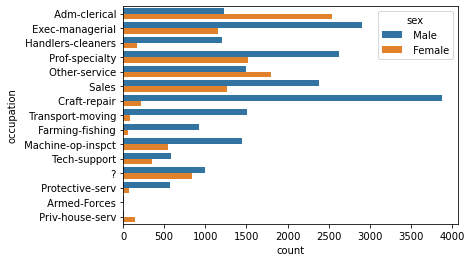

In [14]:
sns.countplot(data=df, hue='sex', y='occupation')

<font color='pink' size='2'>
In this graphic we can see that men are much more abundant in the occupation of craft-repair and in fact, there is a lot of difference specifically in that field with respect to women. In the adm-clerical area it is conce women abound.
</font>

In [ ]:
#sns.countplot(data=df, x='sex') #evidence that are more men than women in the data.
sns.countplot(data=df, hue='income', y='sex')

<font color='pink' size='2'>
In this graph we can see that men earn more than women above 50K, however,
there are more men earning less than or equal to 50K.
Although this might seem unfair, we must keep in mind that there are more men than women
within our data, so however unfair the difference is, it's actually
mainly because there is not the same amount of data between the two.
</font>